Model: SIRM

Parameters swept:
  mu_max: 0 to 1 (51 points)
  polarization: 0 to 1 (51 points)

Results summary:
  Total parameter combinations: 51
  R0 range: 1.2623 to 2.4877
  Homophily measure: 0.0000

Final state compartments:
  S: avg=0.3119, min=0.1025, max=0.7670
  I: avg=0.0000, min=0.0000, max=0.0000
  R: avg=0.6881, min=0.2330, max=0.8975


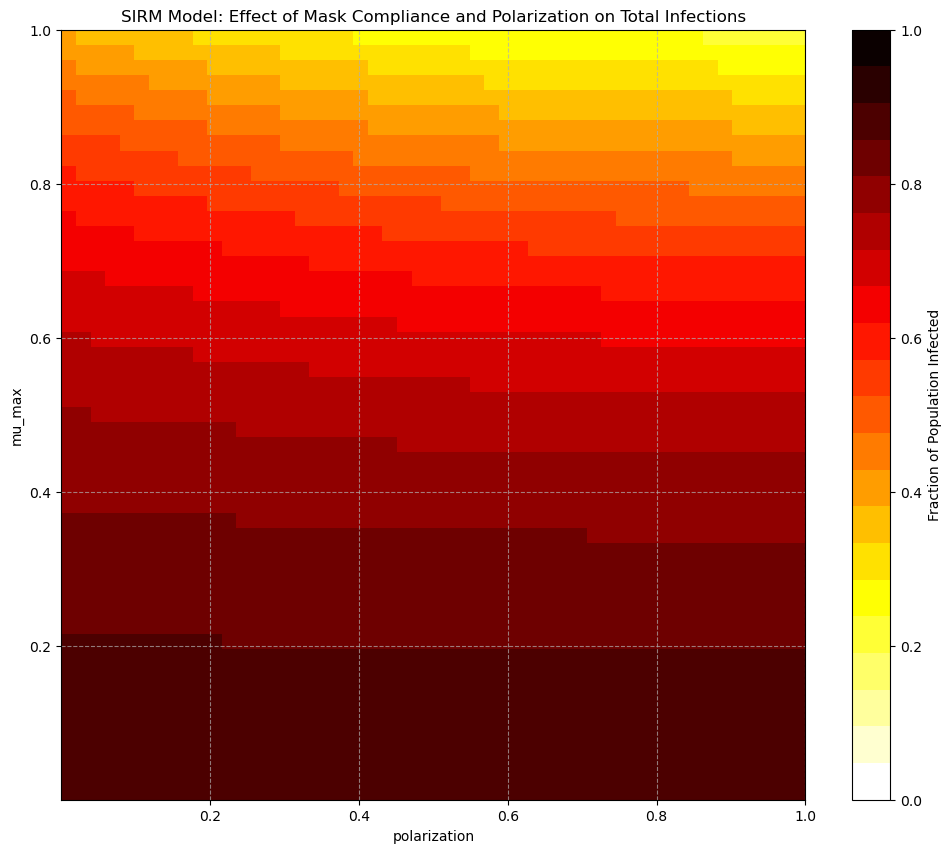

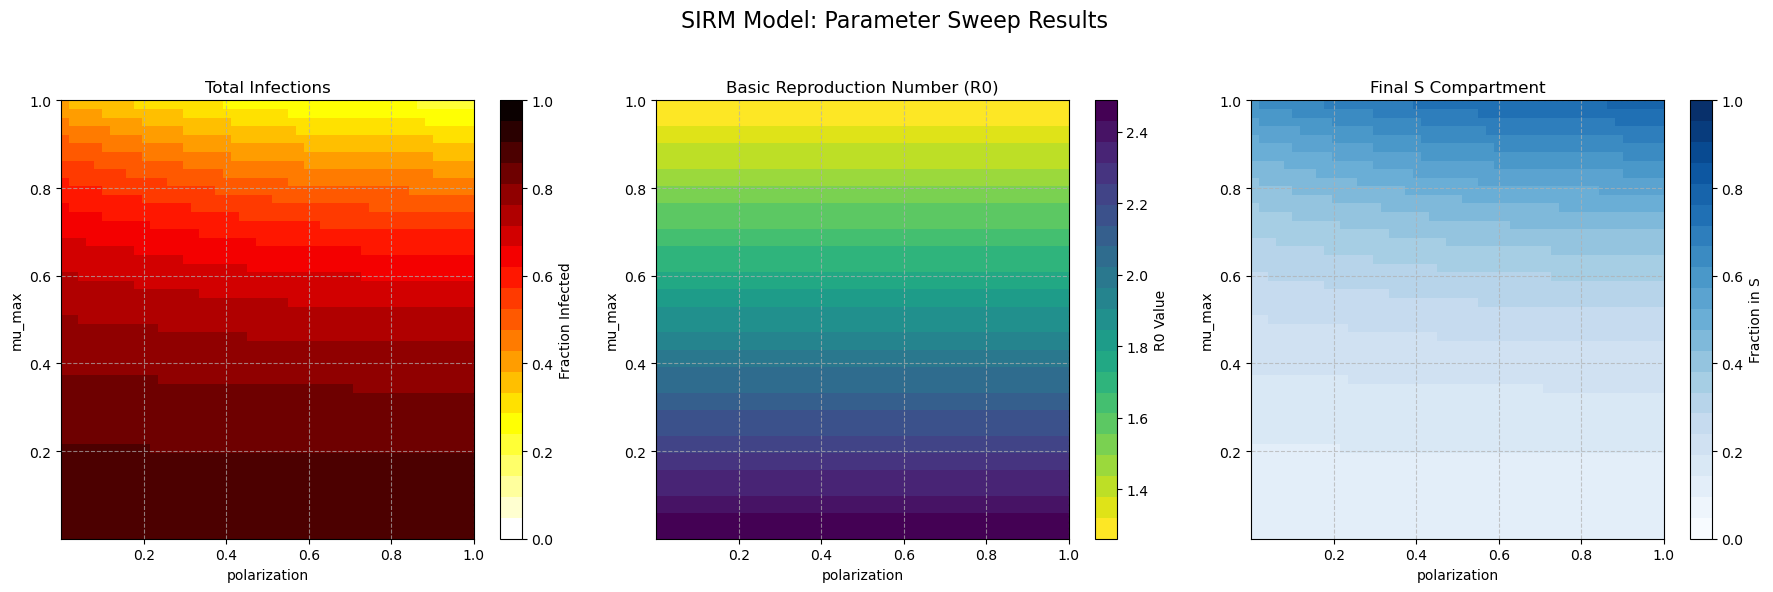

In [ ]:
import jax.numpy as jnp
from src.models import SIRM
from src.utils.batch_sweep import sweep_two_parameters
from src.utils.visualization import plot_sweep_results, plot_multiple_metrics, print_sweep_results, discretize_cmaps

# Define parameter ranges
NB = 51
NP = 51
mask_max_range = {"m": 0, "M": 1, "n": NB}  # Maximum mask compliance
pol_range = {"m": 0, "M": 1, "n": NP}       # Population polarization

# Run parameter sweep
results_MASKS = sweep_two_parameters(
    model_module=SIRM,
    param1_name="mu_max",           # parameter 1 name
    param1_range=mask_max_range,    # parameter 1 range
    param2_name="beta_params",      # parameter 2 name
    param2_range=pol_range,         # parameter 2 range
    custom_base_params={
        'beta_M': 0.25,             # Maximum susceptibility
        'recovery_rate': 0.1,       # Recovery rate
        'dT': 1,                    # Time step
        'homophilic_tendency': 0,   # No homophily
        'SPB_exponent': 1           # Linear behavior pattern
    },
    simulated_days=1000,            # Simulation duration
    population_size=100,            # Number of population compartments
    batch_size=1000                 # Process 1000 simulations at once
)

# Print a summary of the results
print_sweep_results(results_MASKS)

# Basic visualization: Total infections
fig1 = plot_sweep_results(
    results_MASKS, 
    metric="infections",
    cmap=discretize_cmaps("hot_r", 21),
    title_prefix="Effect of Mask Compliance and Polarization on "
)

# Multiple metrics visualization
fig2 = plot_multiple_metrics(
    results_MASKS,
    metrics=["infections", "r0", "S"],
    cmaps=[discretize_cmaps("hot_r", 21), discretize_cmaps("viridis_r", 21), discretize_cmaps("Blues", 21)],
    fig_size=(18, 6)
)

# Save the figures
#fig1.savefig("mask_pol_infections.png", dpi=300, bbox_inches='tight')
#fig2.savefig("mask_pol_metrics.png", dpi=300, bbox_inches='tight')

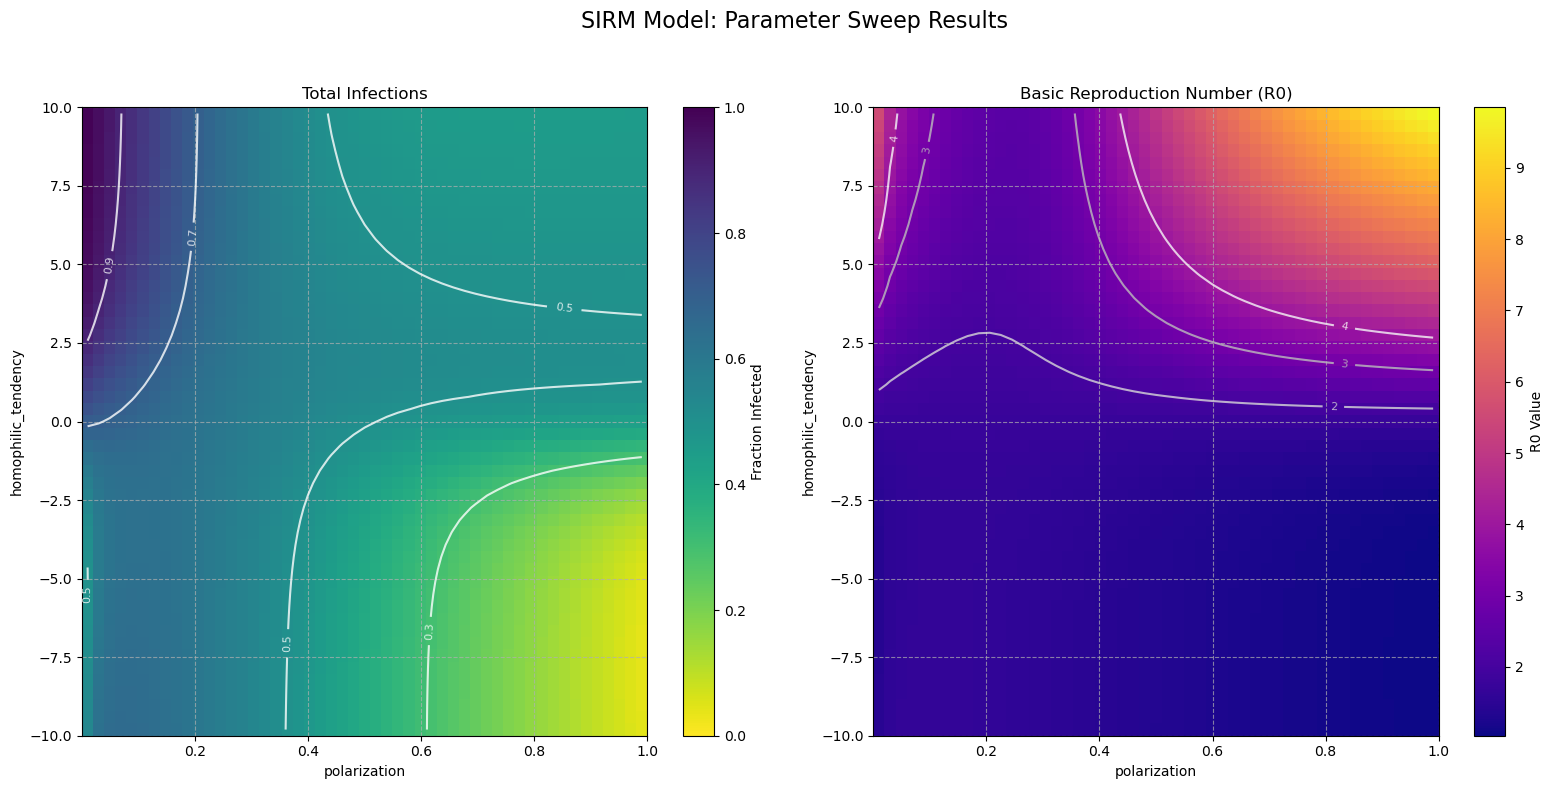

In [5]:
import jax.numpy as jnp
from src.models import SIRM
from src.utils.batch_sweep import sweep_two_parameters
from src.utils.visualization import plot_sweep_results, plot_multiple_metrics

# Define parameter ranges
NB = 51
NP = 51
homophilic_tendency = {"m": -10, "M": 10, "n": NB}  # Homophily parameter
pol_range = {"m": 0, "M": 1, "n": NP}               # Population polarization

# Run parameter sweep
results_HOM = sweep_two_parameters(
    model_module=SIRM,
    param1_name="beta_params",           # parameter 1 name
    param1_range=pol_range,              # parameter 1 range
    param2_name="homophilic_tendency",   # parameter 2 name
    param2_range=homophilic_tendency,    # parameter 2 range
    custom_base_params={
        'beta_M': 0.35,            # Maximum susceptibility
        'recovery_rate': 0.1,      # Recovery rate
        'dT': 1,                   # Time step
        'SPB_exponent': 1,         # Linear behavior pattern
        'mu_max': 1,               # Maximum mask compliance
        'mu_min': 0                # Minimum mask compliance
    },
    simulated_days=1000,
    population_size=100,
    batch_size=1000
)

# Visualize results with contours
fig3 = plot_multiple_metrics(
    results_HOM,
    metrics=["infections", "r0"],
    cmaps=["viridis_r", "plasma"],
    fig_size=(16, 8),
    contour_values=[
        [0.3, 0.5, 0.7, 0.9],  # Contour levels for infections
        [1.0, 2.0, 3.0, 4.0]   # Contour levels for R0
    ],
    contour_colors=[
        ["white"],              # Contour color for infections
        ["#f7f7f7", "#d9d9d9", "#bdbdbd"]  # Contour colors for R0
    ]
)

# Save the figure
#fig3.savefig("homophily_pol_contours.png", dpi=300, bbox_inches='tight')

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


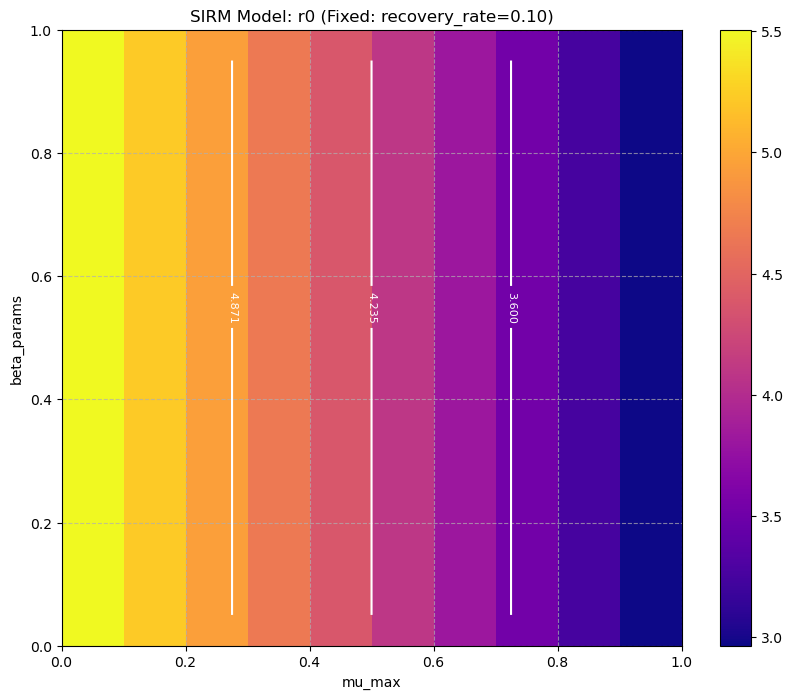

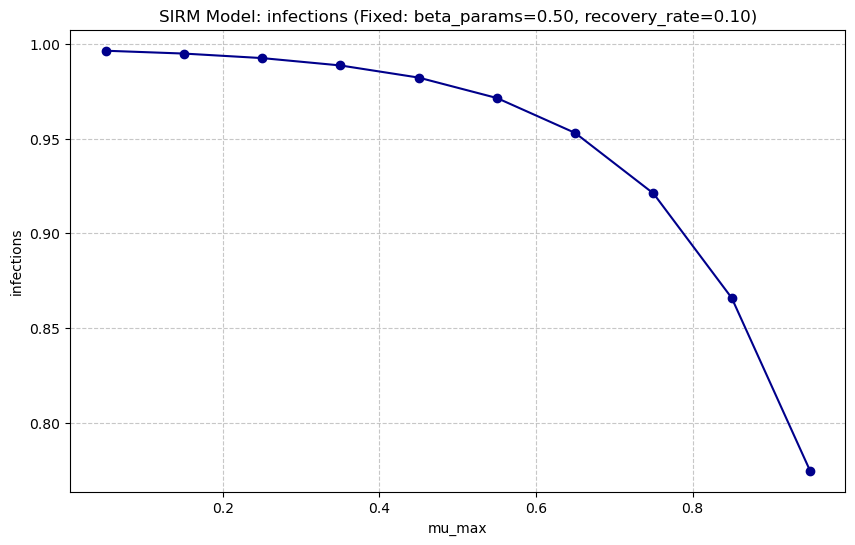

In [1]:
from src.models import SIRM
from src.utils.batch_sweep import sweep_n_parameters
from src.utils.visualization import plot_parameter_slice

# Define a 3D parameter sweep
param_specs = {
    "mu_max": {"m": 0, "M": 1, "n": 10},           # Mask compliance
    "beta_params": {"m": 0, "M": 1, "n": 10},      # Polarization
    "recovery_rate": {"m": 0.05, "M": 0.2, "n": 4} # Recovery rate
}

# Run 3D sweep
results_3D = sweep_n_parameters(
    model_module=SIRM,
    param_specs=param_specs,
    simulated_days=1000
)

# Visualize a 2D slice with recovery_rate fixed at 0.1
slice_plot = plot_parameter_slice(
    results_3D,
    fixed_params={"recovery_rate": 0.1},
    output_key="r0",
    cmap="plasma",
    add_contours=True
)

# For a 1D slice, fix two parameters
from src.utils.visualization import plot_1d_parameter_slice

# Visualize how mask compliance affects outcomes at fixed polarization and recovery rate
slice_1d = plot_1d_parameter_slice(
    results_3D,
    fixed_params={"beta_params": 0.5, "recovery_rate": 0.1},
    output_key="infections",
    color="darkblue"
)

mu_max: Normalized sensitivity = 0.2217
beta_params: Normalized sensitivity = 0.0082
recovery_rate: Normalized sensitivity = 0.7203


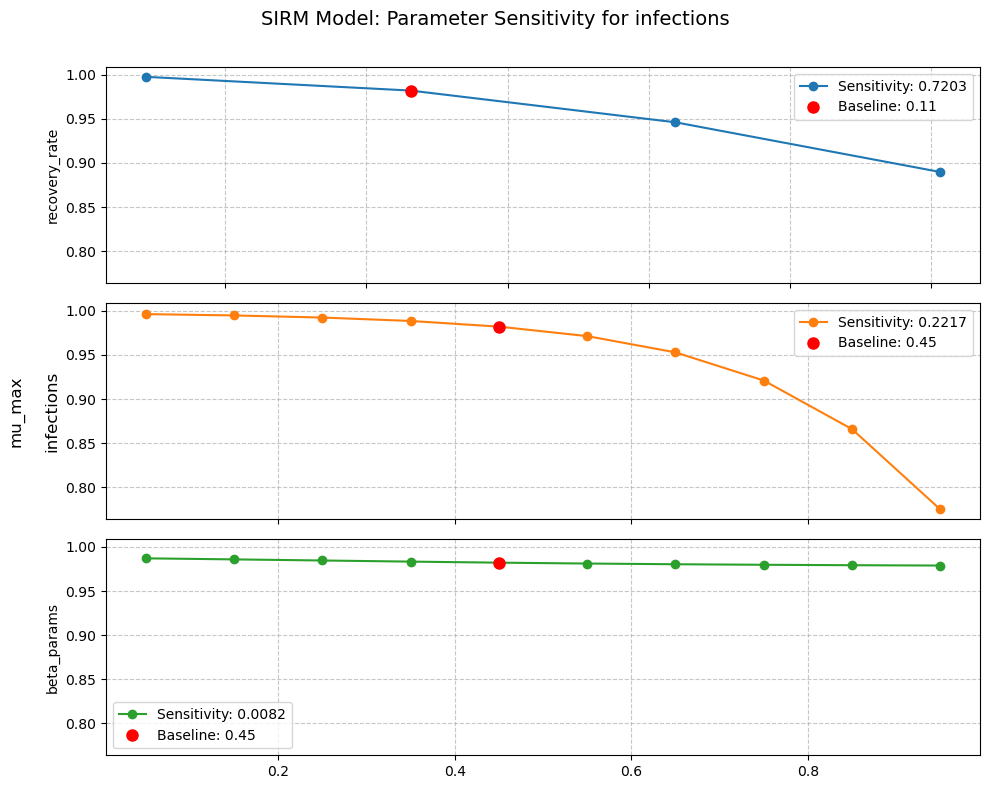

In [2]:
from src.utils.visualization import analyze_parameter_sensitivity

# Analyze parameter sensitivity
sensitivity = analyze_parameter_sensitivity(
    results_3D,
    output_key="infections",
    plot=True,
    fig_size=(10, 8),
    save_path="sensitivity_analysis.png"
)

# Access sensitivity metrics
for param, metrics in sensitivity.items():
    print(f"{param}: Normalized sensitivity = {metrics['normalized_sensitivity']:.4f}")

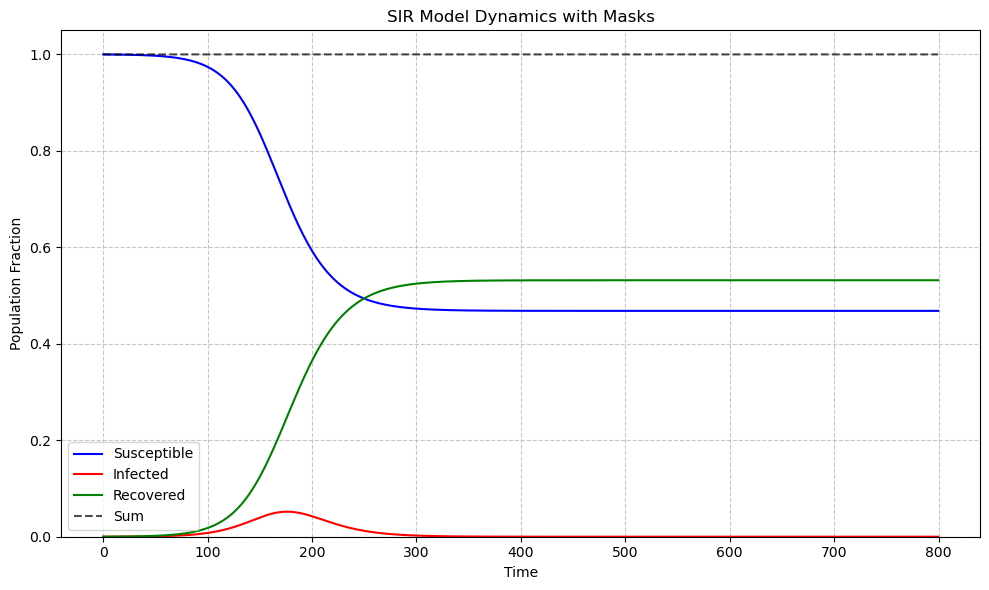

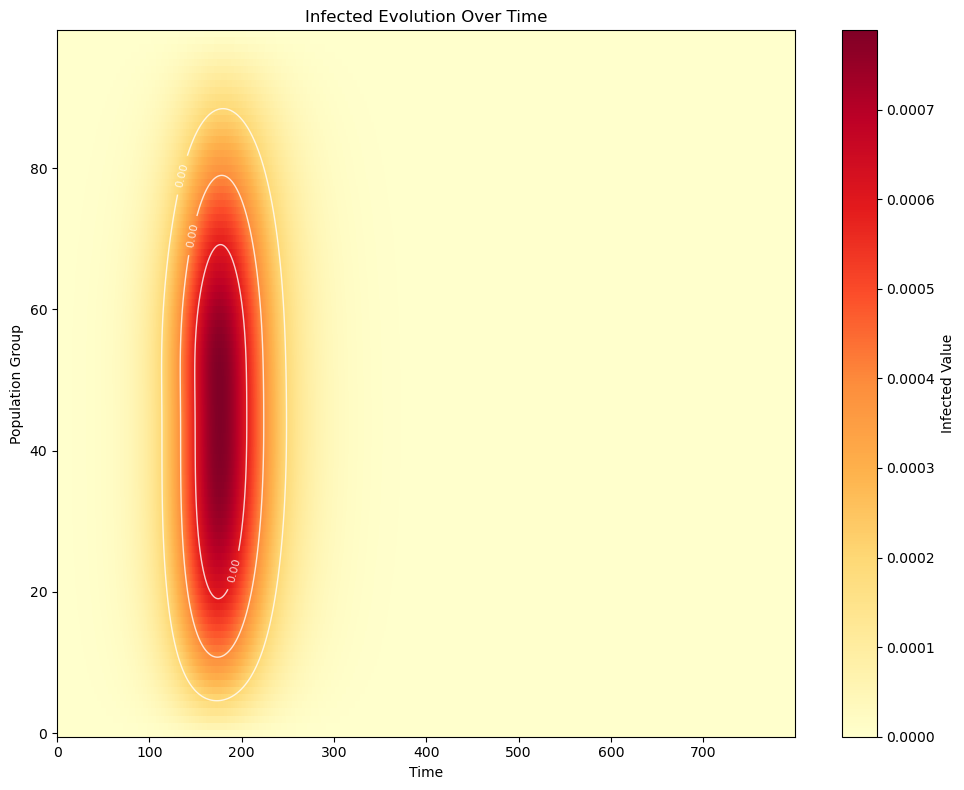

In [11]:
from src.models import SIRM
from src.utils.visualization.trajectory import plot_time_series, plot_heatmap_over_time
import jax.numpy as jnp
# Run a simulation with trajectory output

simulated_days = 800
results_traj = SIRM.run_simulation(
    beta_params=(2, 2),  # Symmetric distribution (no polarization)
    params={
        'beta_M': 0.25,
        'recovery_rate': 0.1,
        'mu_max': 0.8,
        'dT': 0.25,
        'homophilic_tendency': -10
    },
    simulated_days=simulated_days,
    return_trajectory=True  # Return full trajectory instead of just final state
)

# Unpack results
trajectory, r0, h = results_traj

# Plot time series for S, I, R compartments
compartment_names = ["Susceptible", "Infected", "Recovered"]
time_points = jnp.arange(0, simulated_days, 0.25)  # Time points (days)

ts_plot = plot_time_series(
    trajectory,
    compartment_names=compartment_names,
    time_points=time_points,
    title="SIR Model Dynamics with Masks",
    colors=["blue", "red", "green"],
    plot_sum=True  # Also plot sum of all compartments (should be 1.0)
)

# Plot a heatmap showing Infected compartment distribution over time
heatmap = plot_heatmap_over_time(
    trajectory,
    compartment_idx=1,  # Index 1 is Infected
    compartment_name="Infected",
    time_points=time_points,
    y_label="Population Group",
    contours=True,
    cmap="YlOrRd"
)

In [ ]:
%load_ext autoreload
%autoreload 2
import jax.numpy as jnp
import matplotlib.pyplot as plt
import numpy as np
from src.models import SIRM
from src.utils.batch_sweep import run_multi_curve_sweep
import matplotlib.pyplot as plt

# Import necessary modules from the BEACON framework
from src.models import SIRM
from src.utils.batch_sweep import sweep_one_parameter
from src.utils.visualization import plot_compartment_heatmap, Lx, Ly

# Define parameter range for polarization
NB = 101  # Number of points for polarization
pol_range = {"m": 0, "M": 1, "n": NB}  # Population polarization (0-1)

# Run parameter sweep with SIRM model, varying only polarization
results = sweep_one_parameter(
    model_module=SIRM,
    param_name="beta_params",      # polarization parameter
    param_range=pol_range,         # polarization range
    custom_base_params={
        'beta_M': 0.25,             # Maximum susceptibility
        'recovery_rate': 0.1,       # Recovery rate
        'dT': 1,                    # Time step
        'homophilic_tendency': 0,   # No homophily
        'mu_max': 0.8,              # Fixed mask compliance (80%)
        'SPB_exponent': 1           # Linear behavior pattern
    },
    simulated_days=500,             # Simulation duration
    population_size=100,            # Number of population compartments
    batch_size=1000                 # Process 1000 simulations at once
)



No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


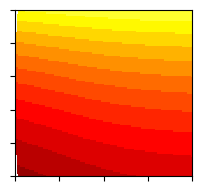

In [29]:
fig = plot_compartment_heatmap(
    results,
    cmap="hot_r",
    discretize=True,
    n_colors=20,
    final_params={
        'Lx': 2.29,
        'Ly': 2.16,
        'vmin': 0,
        'vmax': 1,
        'xlim': [0, 1],
        'ylim': [0, 100]
    }
)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Running sweep for homophilic_tendency = -5
  R0 range: 1.129 to 1.443
Running sweep for homophilic_tendency = -2.5
  R0 range: 1.203 to 1.451
Running sweep for homophilic_tendency = 0
  R0 range: 1.500 to 1.500
Running sweep for homophilic_tendency = 2.5
  R0 range: 1.614 to 2.780
Running sweep for homophilic_tendency = 5
  R0 range: 1.737 to 4.432


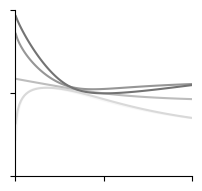

In [12]:
%load_ext autoreload
%autoreload 2
import jax.numpy as jnp
import matplotlib.pyplot as plt
import numpy as np
from src.models import SIRM
from src.utils.batch_sweep import run_multi_curve_sweep
from src.utils.visualization.core import plot_multi_curve_sweep

# Define parameter values
NP = 101
pol_range = {"m": 0, "M": 1, "n": NP}  # Full polarization range
homophily_values = [-5, -2.5, 0, 2.5, 5]  # Specific homophily values

# Define base parameters
base_params = {
    'beta_M': 0.25,           # Maximum susceptibility
    'recovery_rate': 0.1,     # Recovery rate
    'dT': 1,                  # Time step
    'mu_max': 0.8             # Maximum mask compliance
}

# Run the multi-curve sweep
data_matrix, pol_values, hom_values = run_multi_curve_sweep(
    model_module=SIRM,
    x_param="beta_params",         # Parameter for x-axis
    x_range=pol_range,             # Range for x parameter
    curve_param="homophilic_tendency",  # Parameter for different curves
    curve_values=homophily_values,      # Values for curve parameter
    base_params=base_params,
    simulated_days=1000,
    population_size=100
)
fig = plot_multi_curve_sweep(
    data_matrix=data_matrix,
    continuous_variable=pol_values,
    discrete_variable=hom_values,
    continuous_label="Polarization",
    metric_label="Infections",
    xlim= [0, 1],
    ylim= [0, 1],
    xticks =[0, 0.5, 1.0],
    xticklabels = [],
    yticks = [0, 0.5, 1.0],
    yticklabels=[],
    colors=["#f7f7f7", "#d9d9d9", "#bdbdbd", "#969696", "#737373"],

)

In [16]:
POLS = homogeneous_distribution(5,0,1)
print(POLS)

[0.1        0.29999998 0.5        0.6999999  0.9       ]
